In [ ]:
%pip install -q ipywidgets
%pip install seaborn

: 

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import matplotlib.pyplot as plt

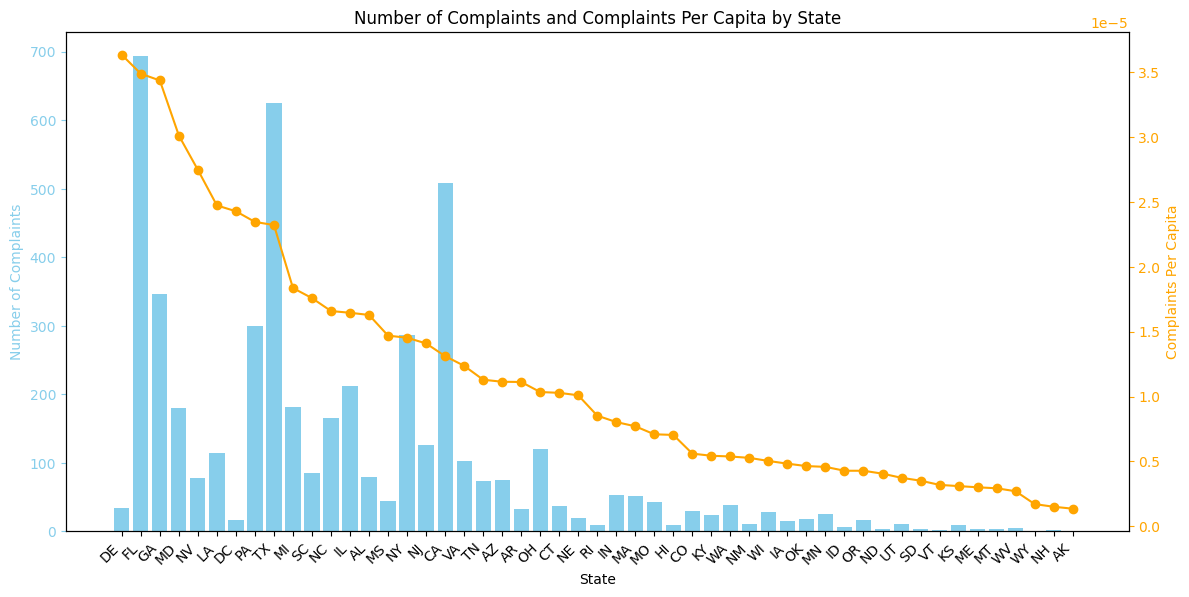

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load complaint dataset
df_complaints = pd.read_csv('complaints.csv', nrows=5000)

# Load population dataset
df_population = pd.read_csv('us-state-populations.csv')

# Code is the common column name between the datasets
df_merged = pd.merge(df_complaints, df_population, left_on='State', right_on='code')

# Group by state and calculate the number of complaints and population
complaints_by_state = df_merged.groupby('State').size().reset_index(name='Number of Complaints')
population_by_state = df_merged.groupby('State')['pop_2014'].max().reset_index()

# Calculate complaints per capita
complaints_by_state['Complaints Per Capita'] = complaints_by_state['Number of Complaints'] / population_by_state['pop_2014']

# Sort the DataFrame by complaints per capita in descending order
complaints_by_state = complaints_by_state.sort_values(by='Complaints Per Capita', ascending=False)

# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of complaints
ax1.bar(complaints_by_state['State'], complaints_by_state['Number of Complaints'], color='skyblue', label='Number of Complaints')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Complaints', color='skyblue')
ax1.tick_params('y', colors='skyblue')
ax1.set_xticks(range(len(complaints_by_state['State'])))
ax1.set_xticklabels(complaints_by_state['State'], rotation=45, ha='right')

# Create a second y-axis for complaints per capita
ax2 = ax1.twinx()
ax2.plot(complaints_by_state['State'], complaints_by_state['Complaints Per Capita'], color='orange', marker='o', label='Complaints Per Capita')
ax2.set_ylabel('Complaints Per Capita', color='orange')
ax2.tick_params('y', colors='orange')

fig.tight_layout()
plt.title('Number of Complaints and Complaints Per Capita by State')
plt.show()
